-----
<div> <center> ESPACIO PARA BANNER DE LA MAESTRIA </center> </div>   

-----

# Caso-taller:  Analizando el Delito en Chicago

En este caso-taller vamos a utilizar datos geograficos y estimación de densidad de kernel para analizar delitos en Chicago. Esta ciudad es muy famosa no sólo por haber sido el hogar del mafioso Al Capone, sino también por sus altas tasas de delitos. 

Para este taller obtuve datos del portal de la [ciudad de Chicago](https://www.chicago.gov/city/en/dataset/crime.html). La base de datos fue traducida y modificada para nuestras necesidades. Esta contiene todos los homicidios y robos que sucedieron entre el primero de junio y el 31 de agosto de 2019.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta de `data` se encuentra el archivo `Chicago_delitos_verano_2019.csv` cargue estos datos en su *cuaderno*. También se encuentran los arhivos con los poligonos de las areas comunitarias en un archivo comprimido llamado `Areas_comunitarias_Chicago.zip`.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir su procedimiento).

### 2.   Análisis descriptivo de los datos. 

Antes de comenzar el análisis de segmentación haga un análisis descriptivo de los datos, para ello puede hacer uso de estadísticas descriptivas en tablas y/o gráficas.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

Usando los polígonos de las areas comunitarias genere 3 mapas, que muestren para cada area:

1. El total de delitos 
2. El total de robos 
3. El total de homicidios

Nota: utilice una paleta de colores y escala numérica que permita una buena interpretación de los mapas

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

Tomando como centro de la ciudad las coordenadas (-87.627800, 41.881998), estime histogramas que muestren gráficamente el gradiente de número de delitos (y por tipo) por area como función de la distancia al centro de la ciudad. Explique como mide la distancia entre el area comunitaria y el centro de la ciudad y que medidad de distancia utiliza. Elija el ancho de 

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

In [ ]:
import pandas as pd
df = pd.read_csv("data/Chicago_delitos_verano_2019.csv")
df.head()

In [ ]:
import geopandas as gpd
db = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.lon, df.lat))
db.crs = "EPSG:4326"
db.head()

In [ ]:
#db=db.to_crs(26916)


In [ ]:
CBD = pd.DataFrame({
    "lugar": ["CBD"],
    "lat": [41.881998],
    "lon": [-87.627800]
    })


CBD = gpd.GeoDataFrame(CBD, geometry = gpd.points_from_xy(CBD.lon, CBD.lat))

CBD.crs = "EPSG:4326"
CBD["coordenadas"] = CBD["geometry"].apply(lambda x: x.representative_point().coords[:][0])
CBD

In [ ]:
db["coordenadas"] = db["geometry"].apply(lambda x: x.representative_point().coords[:][0])
db.head()

In [ ]:
from geopy.distance import geodesic

In [ ]:
distances = []

for p in range(db.shape[0]):
    punto = db.coordenadas[p]
    distancia = geodesic(
            (CBD.coordenadas[:][0][1], CBD.coordenadas[:][0][0]),
            (punto[1], punto[0])).km
    distances.append(distancia)
    
db['distancias'] = distances

In [ ]:
db.head()

In [ ]:
import seaborn as sns

sns.histplot(db[db.tipo_crimen=='homicidio']['distancias'], multiple="layer", kde=True)

In [ ]:
sns.histplot(db[db.tipo_crimen=='robo']['distancias'], multiple="layer", kde=True)

### 3. Análisis de puntos calientes 

#### 3.1 Vizualización preliminar

Ultilizando la librería `seaborn` genere un  gráfico de disperción de longitud y latitud, junto a los histogramas univariados en los margenes. Haga esta gráfica para:

1. El total de delitos 
2. El total de robos 
3. El total de homicidios

En su análisis y conclusiones compare estos resultados con los obtendinos de agregar al nivel de areas

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 3.1 KDE preliminar

Transforme las grafiacas anteriores a una graficas que muestren la KDE:

1. El total de delitos 
2. El total de robos 
3. El total de homicidios

En su análisis y conclusiones incluya la discusión de cuáles son las ventajas y limitaciones de usar `seaborn` para este análisis.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

### 3. KDE

Usando `statsmodels`

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

### 6. Elección del número de clusters

En los puntos anteriores utilizamos nuestro conocimiento previo sobre los datos para elegir el número de clusters. En este punto, verifique si 40 es realmente el número de cluster que usted elegiría según los criterios que discutimos en los cuadernos teóricos. Explique brevemente en qué consiste cada criterio y aplíquelos para ambos métodos. Compare los resultados obtenidos.



In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

### 7. Robustez de los resultados

#### 7.1 Estandarice los datos y repita los puntos 3., 4., y 5. ¿Hubo alguna mejora en la conformación de los clusters? 

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 7.2 ¿Es necesario realizar la descomposición en componentes principales antes de la clusterización? Comente sobre la presición de los resultados y compare el tiempo que tardan K-medias y K-medoides  con y sin la reducción de dimensionalidad.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

In [ ]:
#Esto para el problem set
#Veamos entonces como luciría si usamos validación cruzada através de anchos de banda y de funciones de kernel
grid = { 
    'bandwidth': bandwidths,
    'kernel': ['gaussian','epanechnikov', 'tophat', 'linear']
}

gridCV = GridSearchCV(KernelDensity(),
                    param_grid=grid,
                    cv=10)
gridCV.fit(vals)

In [12]:
from pyrosm import OSM, get_data

# Bajamos los datos para  Chicago
fp = get_data("chicago")

# Inicializamos el lector para Chicago
osm = OSM(fp)

In [ ]:
?osm.get_landuse

In [9]:
landuse = osm.get_landuse(custom_filter={'landuse': ['retail',"commercial"]})

/Users/iggy/opt/anaconda3/lib/python3.7/site-packages/pyrosm/pyrosm.py:330: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  self.bounding_box,


<AxesSubplot:>

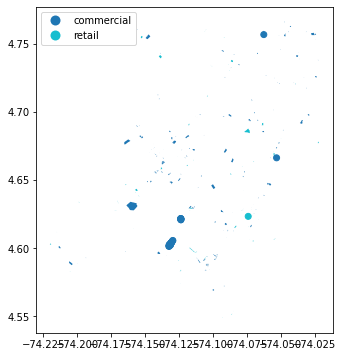

In [10]:
landuse.plot(column='landuse', legend=True, figsize=(10,6))